# Define Parameters.

In [69]:
import matplotlib.pyplot as plt
import matplotlib.legend 
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.legend 
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from numpy.polynomial import Polynomial, Legendre
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import ImageGrid
cmap=plt.get_cmap('RdBu')
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
norm = MidpointNormalize(midpoint=0)

d_max=180
nb=30


#Creando histograma y su archivo de Posiciones
x=[]
DD=[]
DR=[]
RR=[]
for i in range(nb):
    x.append((i+1/2)*d_max/nb)
    DD.append(0)
    DR.append(0)
    RR.append(0)
x=np.array(x)
print(x)

[   3.    9.   15.   21.   27.   33.   39.   45.   51.   57.   63.   69.
   75.   81.   87.   93.   99.  105.  111.  117.  123.  129.  135.  141.
  147.  153.  159.  165.  171.  177.]


In [89]:
#Importando datos
data=np.loadtxt('data_r.dat')
rand=np.loadtxt('rand0_r.dat')
N=len(data)
len(data)==len(rand)

True

In [71]:
#Definicion de una funcion para calcular la distancia entre dos puntos
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)


In [72]:
start=timer()
for i in range(N-1):
    if int(i/100)==i/100:
        print(i)
    for j in range(i,N):
        d_d=dist(data[i],data[j])
        d_r=dist(rand[i],rand[j])
        if d_d<d_max:
            DD[int(d_d*nb/d_max)]+=2
        if d_r<d_max:
            RR[int(d_r*nb/d_max)]+=2         
end=timer()
print(end-start)


start=timer()
for i in range(N):
    if int(i/100)==i/100:
        print(i)
    for j in range(N):
        d=dist(data[i],rand[j])
        if d<d_max:
            DR[int(d*nb/d_max)]+=1
end=timer()
print(end-start)
            
        

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
532.0095858429995
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
524.39

In [96]:
524*1600/3600./24

9.703703703703704

In [ ]:
start=timer()
for i in range(N):
    if int(i/100)==i/100:
        print(i)
    for j in range(N):
        d_d=dist(data[i],data[j])
        d_r=dist(rand[i],rand[j])
        d=dist(data[i],rand[j])
        if d<d_max:
            DR[int(d*nb/d_max)]+=1
end=timer()
print(end-start)

In [85]:
DD=np.array(DD)
DR=np.array(DR)
RR=np.array(RR)
#Construccion del estimador
LS=(DD-2*DR+RR)/RR
HAM=DD*RR/DR**2-1

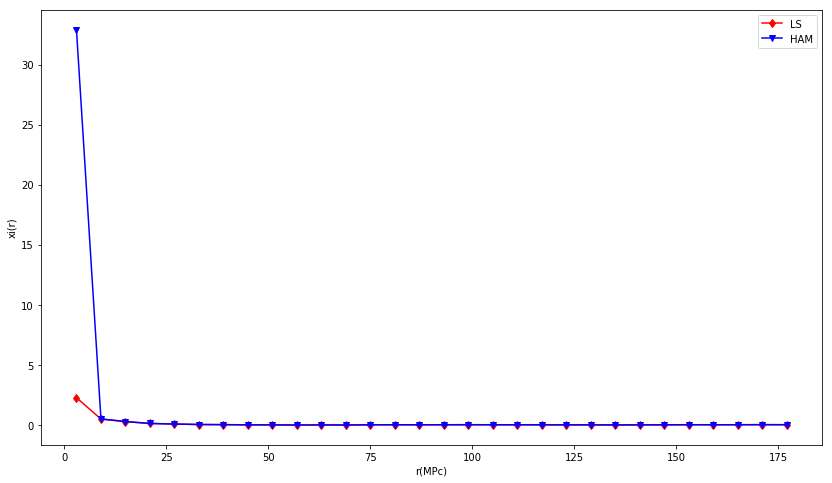

In [86]:
fig = matplotlib.pyplot.gcf()
plt.plot(x,LS,linestyle='-',color='r',marker='d',label='LS')
plt.plot(x,HAM,linestyle='-',color='b',marker='v',label='HAM')
plt.xlabel('r(MPc)')
plt.ylabel('xi(r)')
fig.set_size_inches(14,8)
#plt.xlim(0,len(lista_PH))#len(lista_LS))
#plt.ylim(-k,k)
plt.legend()
#plt.savefig('/Users/fsosa/Desktop/models1.png',bbox_inches='tight')
plt.show() 

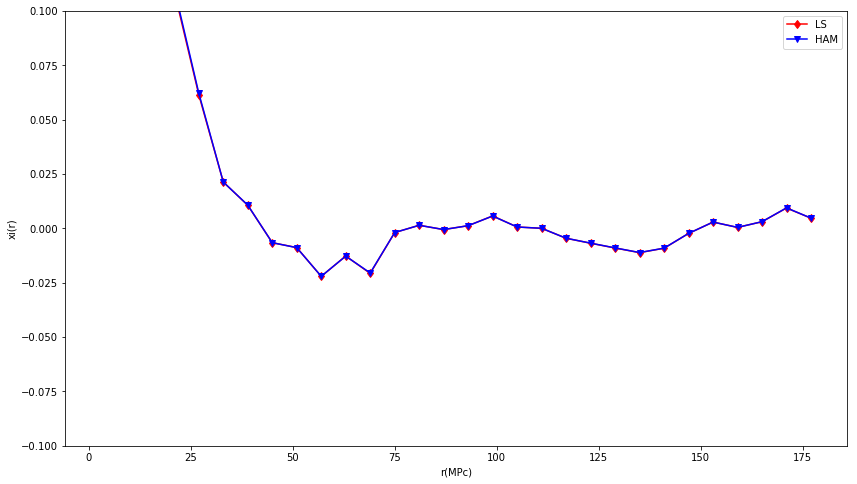

In [92]:
fig = matplotlib.pyplot.gcf()
plt.plot(x,LS,linestyle='-',color='r',marker='d',label='LS')
plt.plot(x,HAM,linestyle='-',color='b',marker='v',label='HAM')

plt.xlabel('r(MPc)')
plt.ylabel('xi(r)')
fig.set_size_inches(14,8)
#plt.xlim(0,len(lista_PH))#len(lista_LS))
plt.ylim(-.1,.1)
plt.legend()
#plt.savefig('/Users/fsosa/Desktop/models1.png',bbox_inches='tight')
plt.show() 

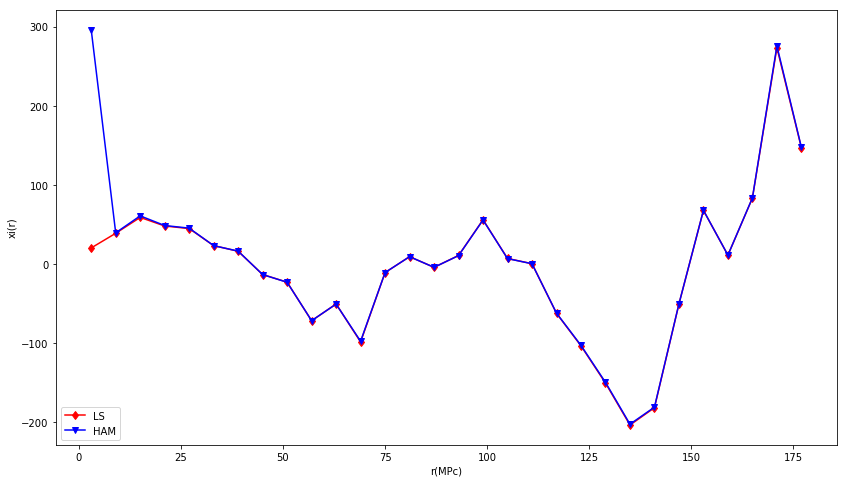

In [88]:
fig = matplotlib.pyplot.gcf()
plt.plot(x,x**2*LS,linestyle='-',color='r',marker='d',label='LS')
plt.plot(x,x**2*HAM,linestyle='-',color='b',marker='v',label='HAM')
plt.xlabel('r(MPc)')
plt.ylabel('xi(r)')
fig.set_size_inches(14,8)
#plt.xlim(0,len(lista_PH))#len(lista_LS))
#plt.ylim(-k,k)
plt.legend()
#plt.savefig('/Users/fsosa/Desktop/models1.png',bbox_inches='tight')
plt.show() 

In [ ]:
# con d_max=60
# 218. segundos con 10K puntos
# 54. segundos con 5K puntos


